### Importing all necessary packages

In [645]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [5]:
os.chdir(r'C:\Users\91630\Downloads\Python Foundation Case Study 1 - Retail Case Study (1)\Case Study 1 - Retail Case Study')

In [7]:
os.getcwd()

'C:\\Users\\91630\\Downloads\\Python Foundation Case Study 1 - Retail Case Study (1)\\Case Study 1 - Retail Case Study'

# 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [647]:
customer=pd.read_csv('Customer.csv')

In [301]:
customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [649]:
transactions=pd.read_csv('Transactions.csv')

In [15]:
transactions.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [651]:
product=pd.read_csv('prod_cat_info.csv')

In [53]:
product.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [653]:
cust_trans = pd.merge(customer, transactions, left_on='customer_Id',right_on='cust_id', how='inner' )
Customer_Final = pd.merge(cust_trans, product, left_on=['prod_cat_code','prod_subcat_code'],right_on=['prod_cat_code','prod_sub_cat_code'],how='inner')

In [315]:
Customer_Final.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,16-01-1970,M,4.0,73109425404,275152,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,18-01-1970,F,4.0,64777271023,275034,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,22-01-1970,F,8.0,87174343938,270829,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,29-01-1970,F,7.0,76242744953,267657,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction


# 2. Prepare a summary report for the merged data set.
#   a. Get the column names and their corresponding data typess

In [637]:
column_info = Customer_Final.dtypes
print(column_info)

customer_Id            int64
DOB                   object
Gender                object
city_code            float64
transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object


# b. Top/Bottom 10 observations

In [606]:
Customer_Final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,Age
0,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction,54
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction,54
2,275034,1970-01-18,F,4.0,64777271023,275034,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction,54
3,270829,1970-01-22,F,8.0,87174343938,270829,NaT,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction,54
4,267657,1970-01-29,F,7.0,76242744953,267657,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction,54
5,274630,1970-02-01,M,4.0,78357345891,274630,NaT,7,5,1,646,67.830,713.830,TeleShop,Books,7,Fiction,54
6,273541,1970-02-01,M,4.0,23916816961,273541,NaT,7,5,4,410,172.200,1812.200,e-Shop,Books,7,Fiction,54
7,269008,1970-02-13,F,6.0,35560569829,269008,NaT,7,5,1,1441,151.305,1592.305,e-Shop,Books,7,Fiction,54
8,269008,1970-02-13,F,6.0,94033312891,269008,2012-04-26,7,5,5,746,391.650,4121.650,MBR,Books,7,Fiction,54
9,267199,1970-02-14,NaN,2.0,56749259881,267199,NaT,7,5,4,1049,440.580,4636.580,MBR,Books,7,Fiction,54


In [327]:
Customer_Final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
23043,268914,15-11-1992,F,3.0,1407823655,268914,10/6/2011,10,5,1,1252,131.460,1383.460,MBR,Books,10,Non-Fiction
23044,269519,17-11-1992,M,9.0,29719500605,269519,24-12-2013,10,5,4,1036,435.120,4579.120,TeleShop,Books,10,Non-Fiction
23045,273524,25-11-1992,F,1.0,25762805863,273524,19-11-2012,10,5,1,1401,147.105,1548.105,Flagship store,Books,10,Non-Fiction
23046,272141,02-12-1992,F,10.0,71337087467,272141,22-07-2012,10,5,-3,-1422,447.930,-4713.930,e-Shop,Books,10,Non-Fiction
23047,272141,02-12-1992,F,10.0,71337087467,272141,16-07-2012,10,5,3,1422,447.930,4713.930,e-Shop,Books,10,Non-Fiction
23048,267812,04-12-1992,F,1.0,63540378797,267812,10/10/2012,10,5,3,224,70.560,742.560,TeleShop,Books,10,Non-Fiction
23049,274618,09-12-1992,F,7.0,71793203305,274618,17-08-2013,10,5,4,691,290.220,3054.220,Flagship store,Books,10,Non-Fiction
23050,268097,15-12-1992,F,7.0,91217108818,268097,1/2/2012,10,5,2,411,86.310,908.310,e-Shop,Books,10,Non-Fiction
23051,268097,15-12-1992,F,7.0,90114483354,268097,31-01-2011,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,10,Non-Fiction
23052,268097,15-12-1992,F,7.0,90114483354,268097,26-01-2011,10,5,4,1408,591.360,6223.360,e-Shop,Books,10,Non-Fiction


# c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)`

In [368]:
numerical_cols = Customer_Final.select_dtypes(include=['number'])
numerical_cols.describe().T.loc[:, ['min', '25%', '50%', '75%', 'max']]

,min,25%,50%,75%,max
customer_Id,266783.000,2.689350e+05,2.709800e+05,2.731140e+05,2.752650e+05
city_code,1.000,3.000000e+00,5.000000e+00,8.000000e+00,1.000000e+01
transaction_id,3268991.000,2.493864e+10,5.009313e+10,7.533000e+10,9.998755e+10
cust_id,266783.000,2.689350e+05,2.709800e+05,2.731140e+05,2.752650e+05
prod_subcat_code,1.000,3.000000e+00,5.000000e+00,1.000000e+01,1.200000e+01
prod_cat_code,1.000,2.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Qty,-5.000,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
Rate,-1499.000,3.120000e+02,7.100000e+02,1.109000e+03,1.500000e+03
Tax,7.350,9.828000e+01,1.990800e+02,3.657150e+02,7.875000e+02
total_amt,-8270.925,7.624500e+02,1.754740e+03,3.569150e+03,8.287500e+03


# d. Frequency tables for all the categorical variables

In [370]:
categorical_cols = Customer_Final.select_dtypes(include=['object'])
for col in categorical_cols:
    print(Customer_Final[col].value_counts())

Gender
M    11811
F    11233
Name: count, dtype: int64
Store_type
e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: count, dtype: int64
prod_cat
Books               6069
Electronics         4898
Home and kitchen    4129
Footwear            2999
Clothing            2960
Bags                1998
Name: count, dtype: int64
prod_subcat
Women                  3048
Mens                   2912
Kids                   1997
Tools                  1062
Fiction                1043
Kitchen                1037
Children               1035
Comics                 1031
Mobiles                1031
Bath                   1023
Furnishing             1007
Non-Fiction            1004
DIY                     989
Cameras                 985
Personal Appliances     972
Academic                967
Computers               958
Audio and video         952
Name: count, dtype: int64


# 3. Generate histograms for all continuous variables and frequency bars for categorical variables

In [372]:
plt.style.use('seaborn-v0_8')

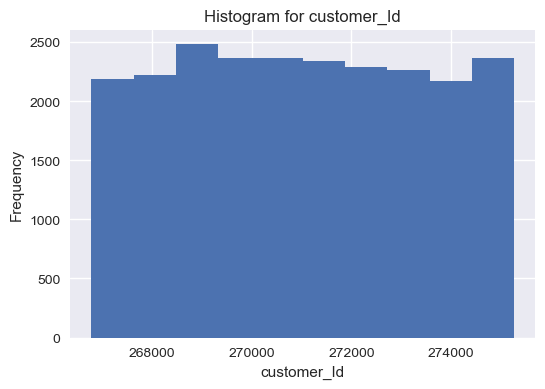

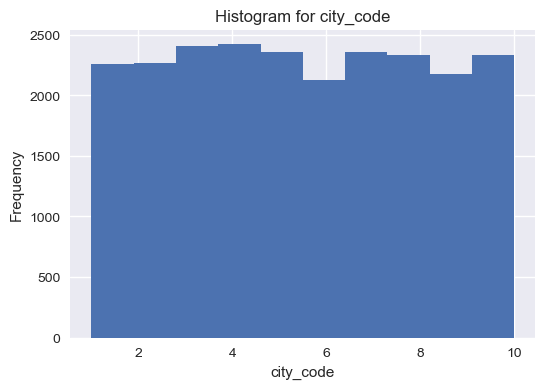

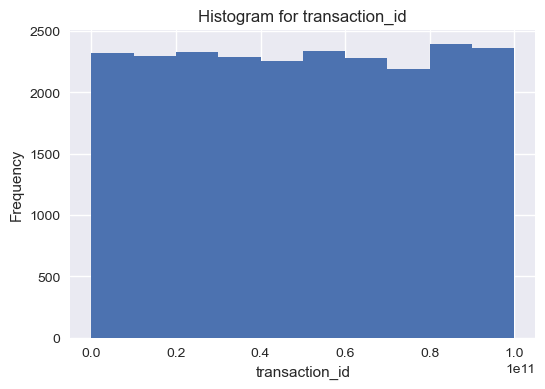

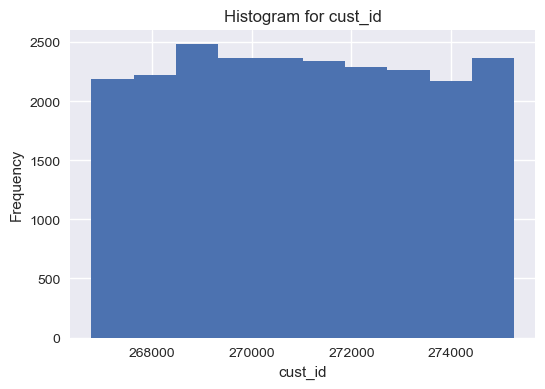

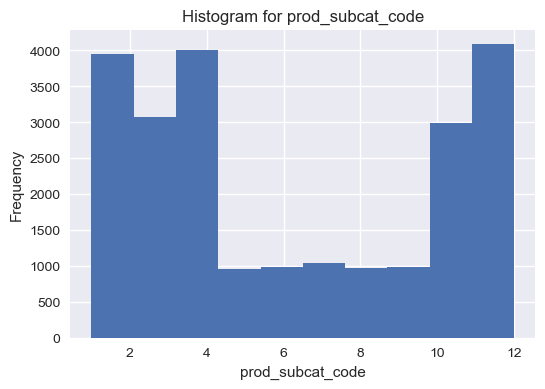

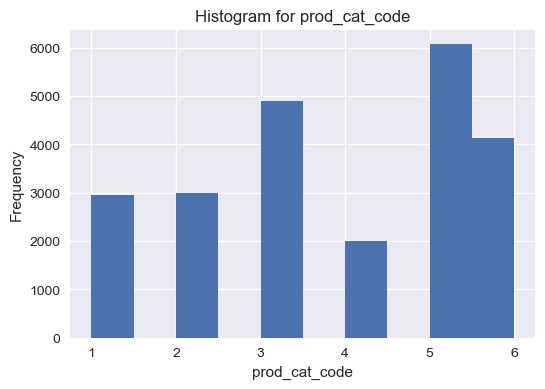

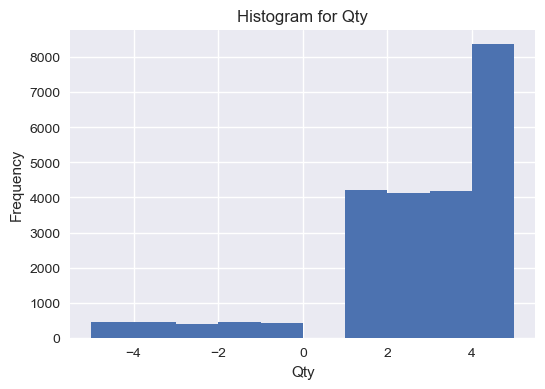

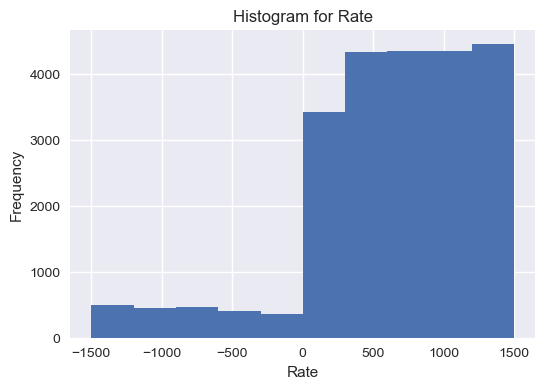

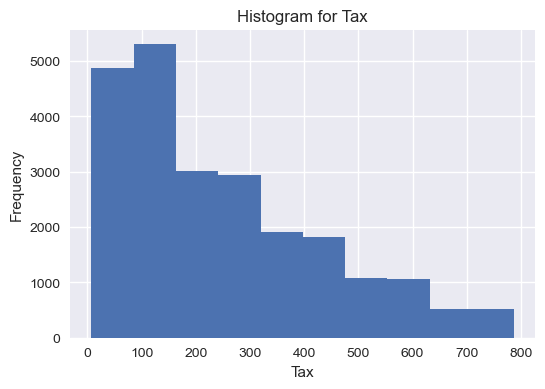

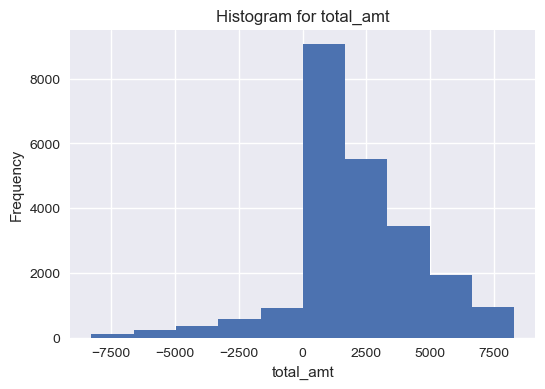

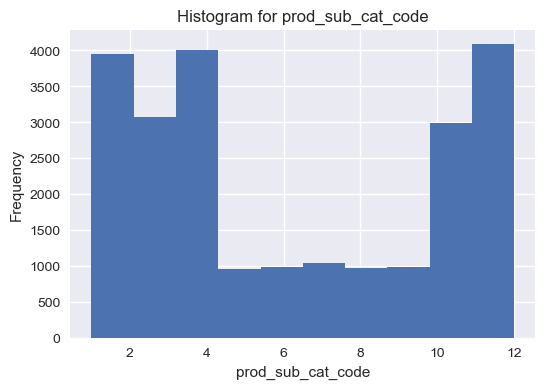

In [374]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    Customer_Final[col].plot(kind='hist')
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

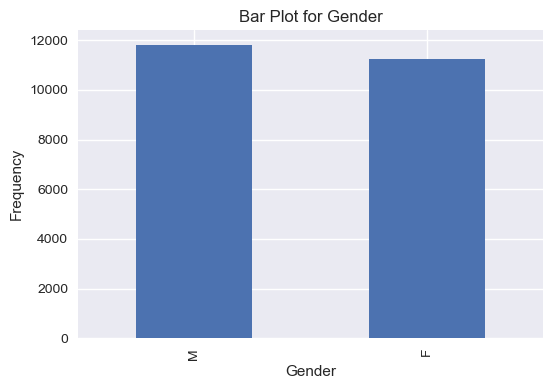

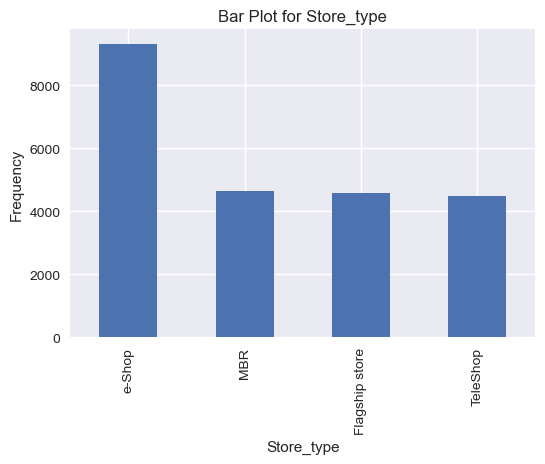

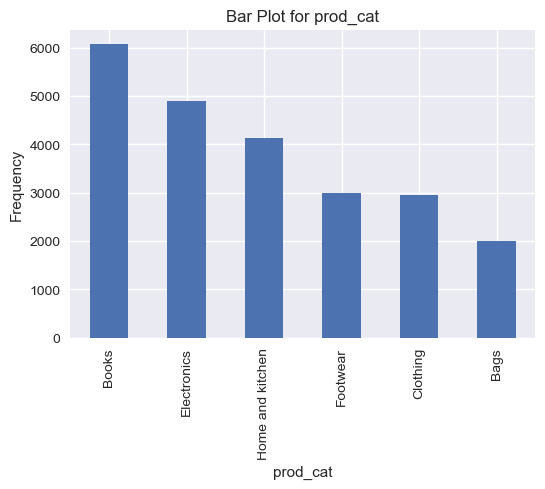

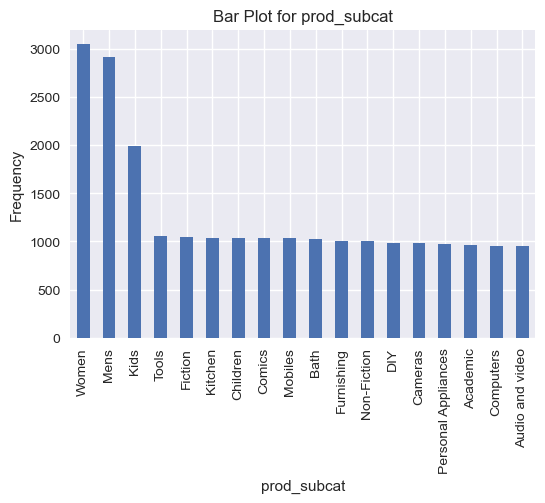

In [376]:
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    Customer_Final[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show();

# 4. Calculate the following information using the merged dataset :
#    a. Time period of the available transaction data

In [364]:
# changing tran_date column to datetime data type
Customer_Final['tran_date'] = pd.to_datetime(Customer_Final['tran_date'], errors='coerce', dayfirst=True)

In [378]:
start_date = Customer_Final['tran_date'].min()
end_date   = Customer_Final['tran_date'].max()
Time_period= end_date-start_date
print(Time_period)

1130 days 00:00:00


#  b. Count of transactions where the total amount of transaction was negative

In [542]:
len(Customer_Final[Customer_Final['total_amt'] < 0])

2177

# 5. Analyze which product categories are more popular among females vs male customers.

In [664]:
# no of transactions made by each category for every Gender
popular = Customer_Final.groupby(['prod_cat', 'Gender'])['Qty'].sum().reset_index()
popular

,prod_cat,Gender,Qty
0,Bags,F,2362
1,Bags,M,2346
2,Books,F,7070
3,Books,M,7587
4,Clothing,F,3425
5,Clothing,M,3748
6,Electronics,F,5832
7,Electronics,M,6476
8,Footwear,F,3716
9,Footwear,M,3555


In [668]:
popular.pivot(index="Gender",columns="prod_cat",values="Qty")

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2362,7070,3425,5832,3716,4895
M,2346,7587,3748,6476,3555,5041


 Products with high transactions that are popular among males are:
 1. Books   2. Electronics 3. Home and kitchen

 Products with high transactions that are popular among females are:
   1. Books   2. Electronics 3. Home and kitchen

# 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [391]:
Customer_Final['city_code'].value_counts()

city_code
4.0     2422
3.0     2411
5.0     2360
7.0     2356
10.0    2333
8.0     2330
2.0     2270
1.0     2258
9.0     2178
6.0     2127
Name: count, dtype: int64

In [397]:
# city with maximum customers

Customer_Final['city_code'].value_counts().idxmax()

4.0

In [415]:
# max city customers count

max_city_count = Customer_Final['city_code'].value_counts().max()
max_city_count

2422

In [413]:
Percentage = (max_city_count/len(Customer_Final))* 100
print(f"{Percentage:.2f}%")

10.51%


# 7. Which store type sells the maximum products by value and by quantity?

In [432]:
summary = Customer_Final.groupby('Store_type').agg({
    'total_amt': 'sum',
    'Qty': 'sum'
     }).reset_index()
print(summary)

       Store_type     total_amt    Qty
0  Flagship store  9.715688e+06  11133
1             MBR  9.674486e+06  11194
2        TeleShop  9.364781e+06  10984
3          e-Shop  1.982482e+07  22763


In [454]:
# Identify the store type with the maximum sales value

store = summary.loc[summary['total_amt'].idxmax()]
store['Store_type'] , store['total_amt']

('e-Shop', 19824816.05)

In [456]:
# Identify the store type with the maximum quantity sold

store = summary.loc[summary['Qty'].idxmax()]
store['Store_type'], store['Qty']

('e-Shop', 22763)

# 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?


In [481]:
stores= Customer_Final.pivot_table(index='prod_cat', columns='Store_type', values='total_amt', aggfunc='sum')
stores

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,870548.835,848678.675,789181.055,1616300.075
Books,2488205.850,2496039.195,2545005.060,5293443.935
Clothing,1194423.230,1287686.335,1241834.360,2527193.565
Electronics,2215136.040,2107514.565,1973338.835,4426474.195
Footwear,1234806.560,1112163.715,1235719.290,2637084.710
Home and kitchen,1712567.675,1822403.570,1579702.475,3324319.570


In [485]:
stores.loc[['Electronics','Clothing'] , 'Flagship store']

prod_cat
Electronics    2215136.04
Clothing       1194423.23
Name: Flagship store, dtype: float64

In [487]:
stores.loc[['Electronics','Clothing'] , 'Flagship store'].sum()

3409559.27

# 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [490]:
amounts = Customer_Final.pivot_table(index='prod_cat',columns='Gender', values='total_amt', aggfunc='sum')
amounts

Gender,F,M
prod_cat,,
Bags,2077985.650,2046722.990
Books,6164692.235,6645972.775
Clothing,3026750.805,3224079.495
Electronics,5019354.210,5703109.425
Footwear,3202552.990,3014672.050
Home and kitchen,4132177.335,4301075.480


In [504]:
total_amount_by_male = amounts.loc[['Electronics'], 'M']
print(total_amount_by_male);

prod_cat
Electronics    5703109.425
Name: M, dtype: float64


# 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [508]:
positive = Customer_Final.loc[Customer_Final["total_amt"]>0,:]
positive.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,1970-01-18,F,4.0,64777271023,275034,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,1970-01-22,F,8.0,87174343938,270829,NaT,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,1970-01-29,F,7.0,76242744953,267657,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction


In [530]:
counts = positive.groupby('customer_Id')['transaction_id'].nunique().reset_index()

#count of unique transactions for each customer
unique = counts[counts['transaction_id']>10]

# count of customers who have more than 10 unique transactions
unique['customer_Id'].count()

6

# 11. For all customers aged between 25 - 35, find out:
# a. What was the total amount spent for “Electronics” and “Books” product categories?

In [ ]:
# changing DOB column to datetime data type

from datetime import datetime
Customer_Final['DOB'] = Customer_Final['DOB'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))

In [574]:
Customer_Final['Age'] = (datetime.now().year - Customer_Final['DOB'].dt.year)

In [588]:
cust = Customer_Final[(Customer_Final['Age'] >= 25) & (Customer_Final['Age'] <= 35)]
trans = cust[cust['prod_cat'].isin(['Electronics', 'Books'])]
total_amount_spent = trans['total_amt'].sum()

print('Rs.',total_amount_spent)

Rs. 3928470.585


# b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [ ]:
# changing tran_date column to datetime data type
Customer_Final['tran_date'] = pd.to_datetime(Customer_Final['tran_date'], errors='coerce', dayfirst=True)

In [603]:
criteria = Customer_Final[((Customer_Final.tran_date >= '2014-01-01')&(Customer_Final.tran_date <= '2014-03-01'))& ((Customer_Final['Age'] >= 25) & (Customer_Final['Age'] <= 35))]
total_amount_between_months = criteria.total_amt.sum()

print('Rs.', total_amount_between_months)

Rs. 236155.07499999998
